## **Name:** First Last

## **Computing ID:** ID

In [449]:
import sys
#!{sys.executable} -m pip install tensorflow
#!{sys.executable} -m pip install scikit-learn

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Lab 4: Unsupervised Learning (100 Points)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1CqzvUaaggcKdCvVi6dS9BAeB9nuQl_Ns?usp=sharing)

In this lab, we will implement 2 models in the unsupervised learning family **K-means clustering** and **Principal Component Analysis (PCA)**.

You will utilize the skills you have gained over the semester to build, explore, and evaluate your models. As always, you will be graded on your model building and interpretation of  results rather than specific performance.

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*h-lAg5H-ZNDRXxX2.png)

# **Part 1: K-Means Clustering (50 points)**

## For Part 1, you will pick from the following preloaded datasets:



In [451]:
pokemon_df = pd.read_csv("https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv")

In [452]:
# Load Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Another option open to you, if you wish, is to  utilize a dataset of your choice (including your final project dataset).**


In a text cell, answer the following exploratory questions and support your observations with any code, if needed.

## **Question 1 (5 points):**
## Read in your dataset as a Pandas DataFrame. Show the first 5 rows. How many rows and columns do you have?

## What are your features and their datatypes?

In [453]:
pokemon_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [454]:
pokemon_df.shape

(800, 13)

In [455]:
pokemon_df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

**There is a total of...** 800 rows and 13 columns. Features are displayed above on the left column, while their types are on the right. However, I am not counting Name and # as features, since they are unique to each pokemon, so should not be taken to account when grouping.

## **Question 2 (5 points):**
## Identify what percentage of each column has missing values and display this information (column name, percentage values missing) in a DataFrame.

## Then, fill in any missing values using any method appropriate for each column's data type and values.

In [456]:
missing = pd.DataFrame(pokemon_df.isnull().sum(), columns=['Num missing'])

missing['Percent missing'] = missing['Num missing']/pokemon_df.shape[0] * 100

missing

,Num missing,Percent missing
#,0,0.00
Name,0,0.00
Type 1,0,0.00
Type 2,386,48.25
Total,0,0.00
HP,0,0.00
Attack,0,0.00
Defense,0,0.00
Sp. Atk,0,0.00
Sp. Def,0,0.00


In [457]:
pokemon_df['Type 2'] = pokemon_df['Type 2'].fillna('None')

missing = pd.DataFrame(pokemon_df.isnull().sum(), columns=['Num missing'])

missing['Percent missing'] = missing['Num missing']/pokemon_df.shape[0] * 100

missing

,Num missing,Percent missing
#,0,0.0
Name,0,0.0
Type 1,0,0.0
Type 2,0,0.0
Total,0,0.0
HP,0,0.0
Attack,0,0.0
Defense,0,0.0
Sp. Atk,0,0.0
Sp. Def,0,0.0


## **Question 3 (5 points):**
## Identify columns in your DataFrame that need to be encoded and use the proper encoder for each feature to transform your categorical data into numerical features.

## In a sentence per each encoded feature, justify your choice in encoder and why you utilized it

In [458]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
pokemon_df['Type 1'] = encoder.fit_transform(pokemon_df['Type 1'])
pokemon_df['Type 2'] = encoder.fit_transform(pokemon_df['Type 2'].fillna('None')) 

type_mapping = {i: label for i, label in enumerate(encoder.classes_)}

pokemon_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,9,14,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,9,14,405,60,62,63,80,80,60,1,False
2,3,Venusaur,9,14,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,9,14,625,80,100,123,122,120,80,1,False
4,4,Charmander,6,12,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,15,4,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,15,4,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,14,8,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,14,1,680,80,160,60,170,130,80,6,True


I encoded the "Type 1" and "Type 2" columns using Label Encoding even though they are not in any particular because there are 18 categories, and using One-Hot Encoding would have added too many dimensions to the dataset, potentially leading to sparse data and higher computational cost. I also used Label encoding for "Legendary", since it's a boolean, so it will just be ither 1 or 0. 

## **Question 4 (5 points):**
## Finally, identify your numerical columns and apply both standardization and normalization.

## Display each numerical column name and its minimum and maximum values in a DataFrame after these 2 processes.

## In 2 to 3 sentences, summarize the DataFrame and the effects of your choice in standardization and normalization had on your numerical features? Why would scaling your data be beneficial for unsupervised learning?

In [459]:
features = pokemon_df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
features

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50
796,700,50,160,110,160,110,110
797,600,80,110,60,150,130,70
798,680,80,160,60,170,130,80


In [460]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standarized_features = scaler.fit_transform(features)

#not including types, since they were not originally numeric
standardized_df = pd.DataFrame(standarized_features, columns=['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

In [461]:
standardized_summary = pd.DataFrame({
    'Column': standardized_df.columns,
    'Min after Standardization': standardized_df.min(),
    'Max after Standardization': standardized_df.max()
}).reset_index(drop=True)

print(standardized_summary)

    Column  Min after Standardization  Max after Standardization
0    Total                  -2.127839                   2.876830
1       HP                  -2.674852                   7.278632
2   Attack                  -2.281379                   3.421972
3  Defense                  -2.209039                   5.010829
4  Sp. Atk                  -1.920993                   3.705602
5  Sp. Def                  -1.866223                   5.684605
6    Speed                  -2.178804                   3.846888


In [462]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
normalized = minmax.fit_transform(features)

normalized_df = pd.DataFrame(normalized, columns=['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

In [463]:
normalized_summary = pd.DataFrame({
    'Column': normalized_df.columns,
    'Min after Normalization': normalized_df.min(),
    'Max after Normalization': normalized_df.max()
}).reset_index(drop=True)

print(normalized_summary)

    Column  Min after Normalization  Max after Normalization
0    Total                      0.0                      1.0
1       HP                      0.0                      1.0
2   Attack                      0.0                      1.0
3  Defense                      0.0                      1.0
4  Sp. Atk                      0.0                      1.0
5  Sp. Def                      0.0                      1.0
6    Speed                      0.0                      1.0


**The methods I used to standardize and normalize my data caused the values of my data to range...**  from a standard distribution (with a mean of 0 and standard deviation of 1) for standardization, and from 0 to 1 for normalization. This transformation helps bring all features to a common scale, allowing algorithms to interpret them more consistently and without bias due to differing scales.

**I think scaling your data is helpful for unsupervised learning because scaled data...** ensures that all features contribute equally to the distance metrics (such as Euclidean distance) used in many clustering algorithms like K-Means. Without scaling, features with larger ranges can dominate the distance calculations, leading to skewed or inaccurate results.

## **Question 5 (7 points):**
## Create a function to instantiate K-Means Clustering model with a user inputted parameter for "k" number clusters. Also tune a minimum of 3 hyperparameters of your choice, referencing documentation as necessary:
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  


## Fit your model to your data, adding your predictions in a column of your DataFrame called cluster. Return this new dataframe in your function. Call your function on your data with k = 3.

In [464]:
from sklearn.cluster import KMeans

def kmeans_clustering(data, k):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=777)  
    kmeans.fit(data)
    data['cluster'] = kmeans.predict(data)
    return data

In [465]:
result_df = kmeans_clustering(standardized_df, 3)

result_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,2
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,1
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,2
...,...,...,...,...,...,...,...,...
795,1.375429,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341,1
796,2.209541,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611,1
797,1.375429,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310,1
798,2.042718,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635,1


## **Question 6 (5 points):**
## Write code to plot your predicted clusters, with different colors for different cluster numbers. Apply this code to the predictions you obtained in Question 5 and describe the output.

## In a minimum of 3 sentences, based on all the information you have, describe why k = 3 seems like a reasonable or unreasounable amount of clusters for your data.

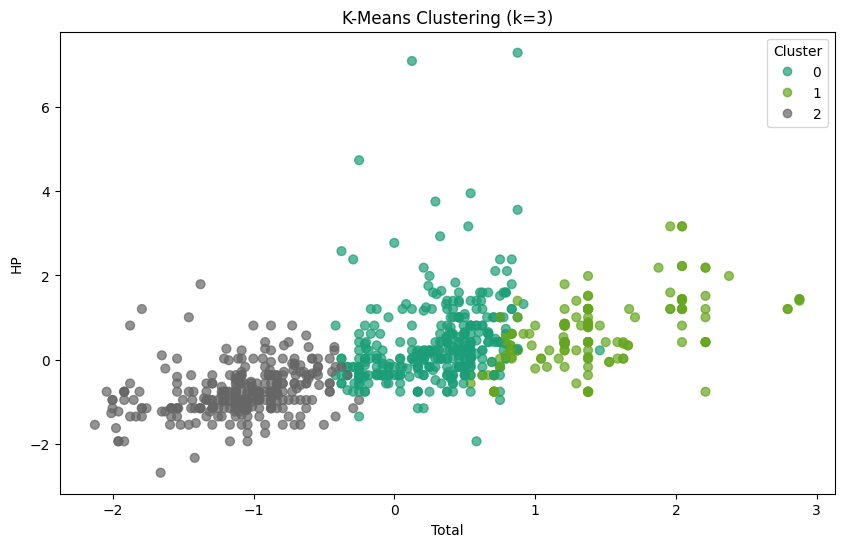

In [466]:
x = result_df['Total']
y = result_df['HP']

plt.figure(figsize=(10, 6))

scatter = plt.scatter(x, y, c=result_df['cluster'], cmap='Dark2', s=40, alpha = 0.7)

plt.title('K-Means Clustering (k=3)')
plt.xlabel('Total')
plt.ylabel('HP')

handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")

plt.show()

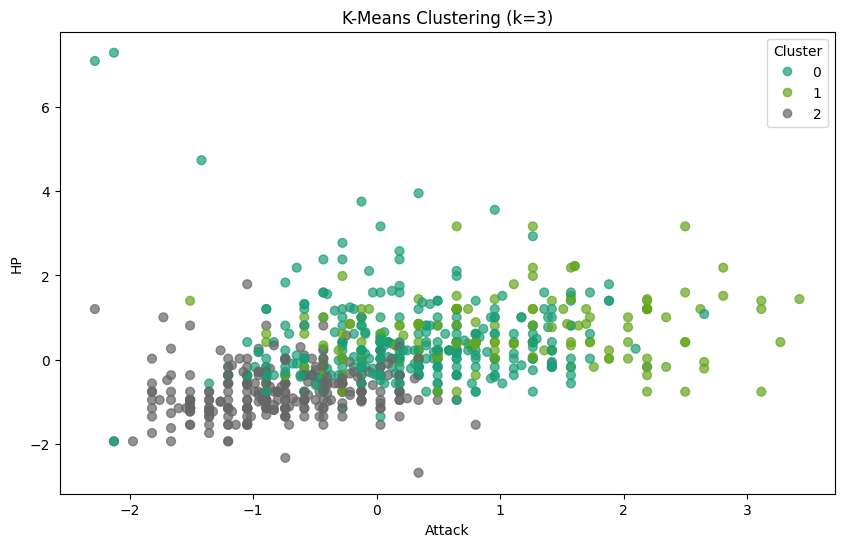

In [467]:
x = result_df['Attack']
y = result_df['HP']

plt.figure(figsize=(10, 6))

scatter = plt.scatter(x, y, c=result_df['cluster'], cmap='Dark2', s=40, alpha = 0.7)

plt.title('K-Means Clustering (k=3)')
plt.xlabel('Attack')
plt.ylabel('HP')

handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")

plt.show()

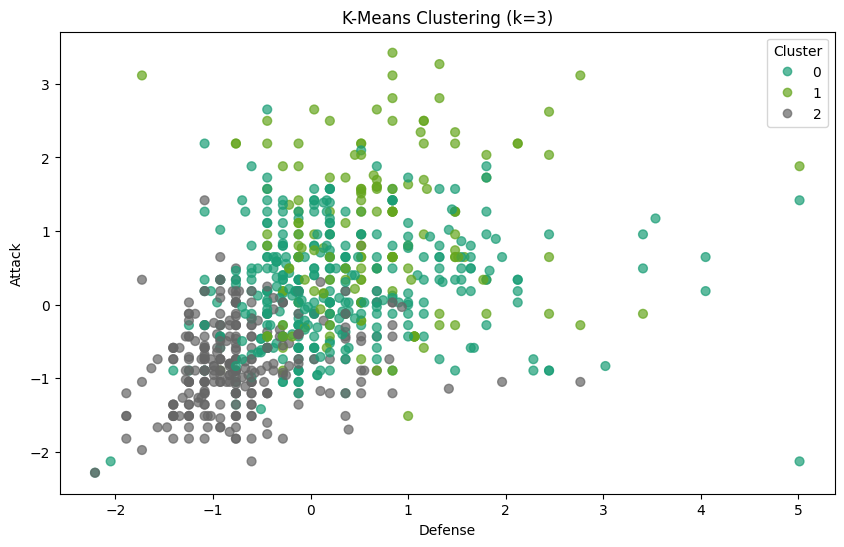

In [468]:
x = result_df['Defense']
y = result_df['Attack']

plt.figure(figsize=(10, 6))

scatter = plt.scatter(x, y, c=result_df['cluster'], cmap='Dark2', s=40, alpha = 0.7)

plt.title('K-Means Clustering (k=3)')
plt.xlabel('Defense')
plt.ylabel('Attack')

handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")

plt.show()

**Because the predicted clusters show a lot of overlap, I believe k=3 is not a reasonable choice...** for this dataset. While the Total vs. HP plot suggests some separation between clusters, most other feature combinations exhibit significant mixing, indicating that three clusters may be too broad to capture the data’s true structure. Additionally, the clustering appears to be heavily influenced by the Total feature, potentially overshadowing subtler patterns in other variables. Increasing the number of clusters could allow for a more nuanced grouping that better reflects differences across multiple features, rather than relying so strongly on just one.

## **Question 7 (8 points):**
## Plot an elbow plot for your clustering model with any metric of your choice and pick an optimal k value.

## Then, utilize the optimal k to tune at least 3 K-Means Clustering models by varying the hyperparameters. For each model, you will use the optimal k number of clusters you identified in your elbow plot but vary at least 3 other hyperparameters. Plot your predicted clusters differentiated by color.

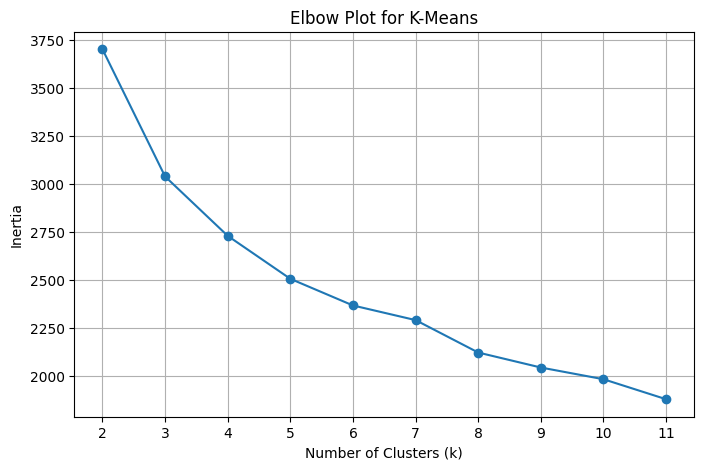

In [469]:
from sklearn.cluster import KMeans

X = standardized_df 

inertia = []
k_range = range(2, 12)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=777)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [470]:
# Model 1
kmeans1 = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=10, random_state=777)
kmeans1.fit(X)
X['cluster1'] = kmeans1.labels_

# Model 2
kmeans2 = KMeans(n_clusters=8, init='random', n_init=500, max_iter=500, random_state=42)
kmeans2.fit(X)
X['cluster2'] = kmeans2.labels_

# Model 3
kmeans3 = KMeans(n_clusters=8, init='k-means++', n_init=1000, max_iter=1000, algorithm='elkan', random_state=99)
kmeans3.fit(X)
X['cluster3'] = kmeans3.labels_

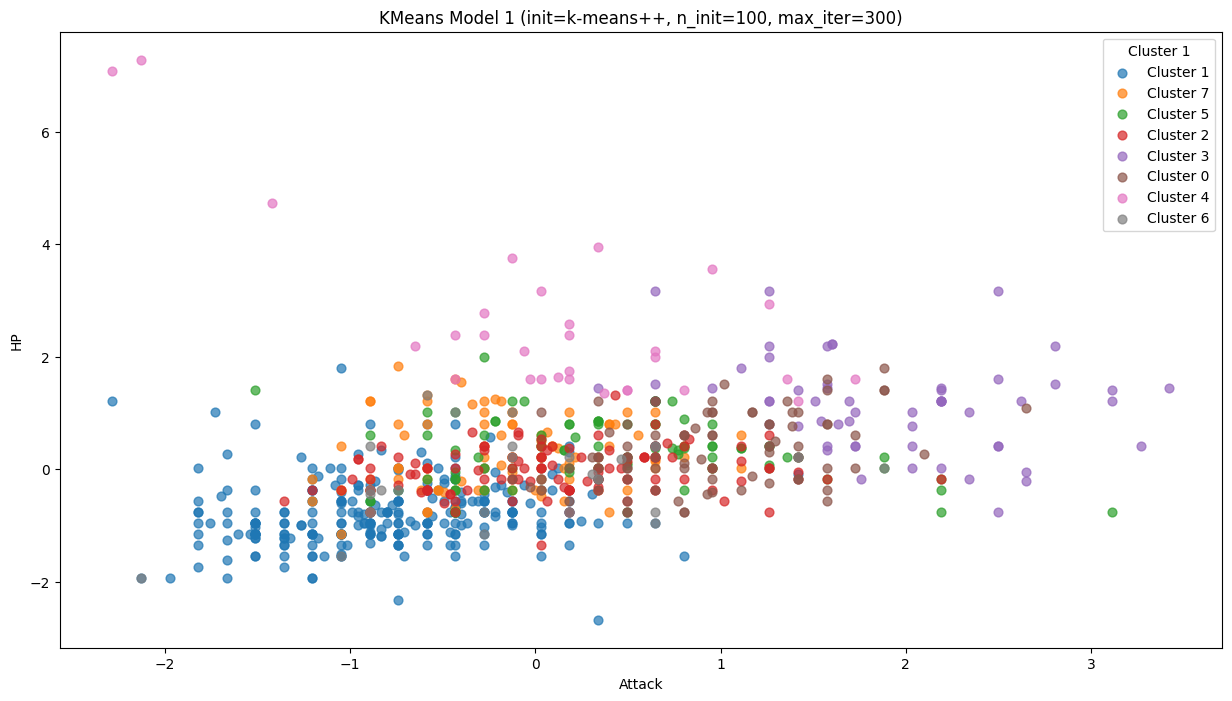

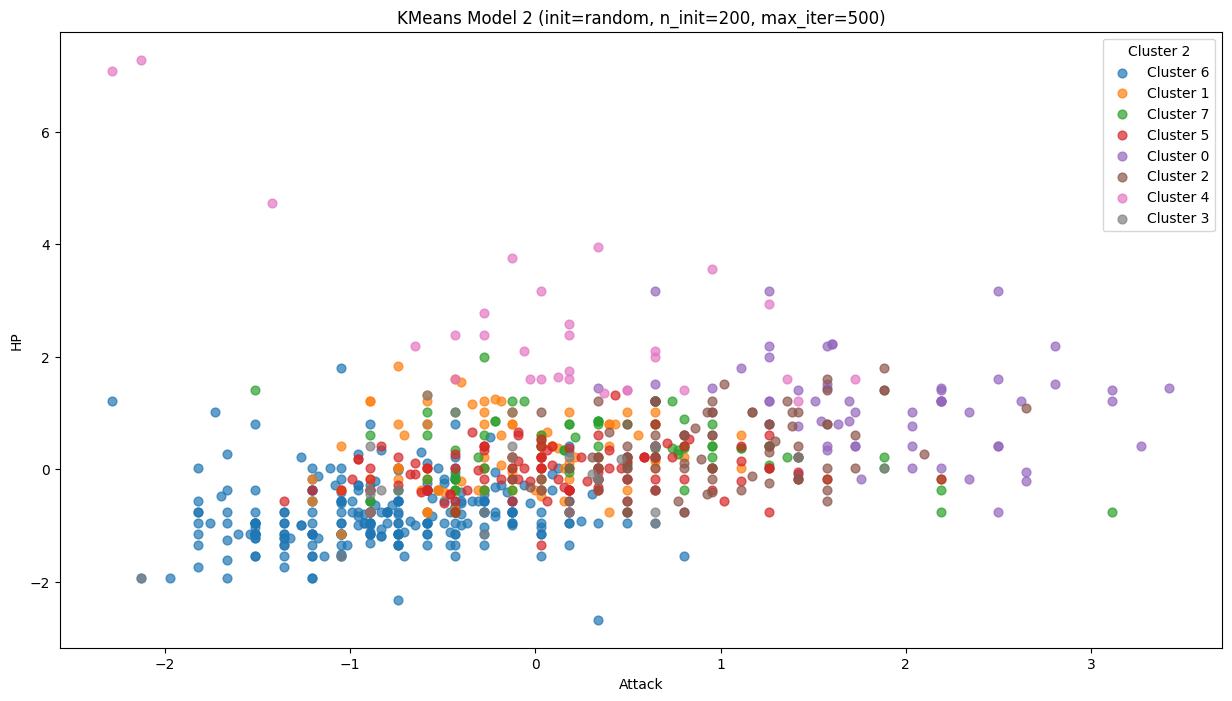

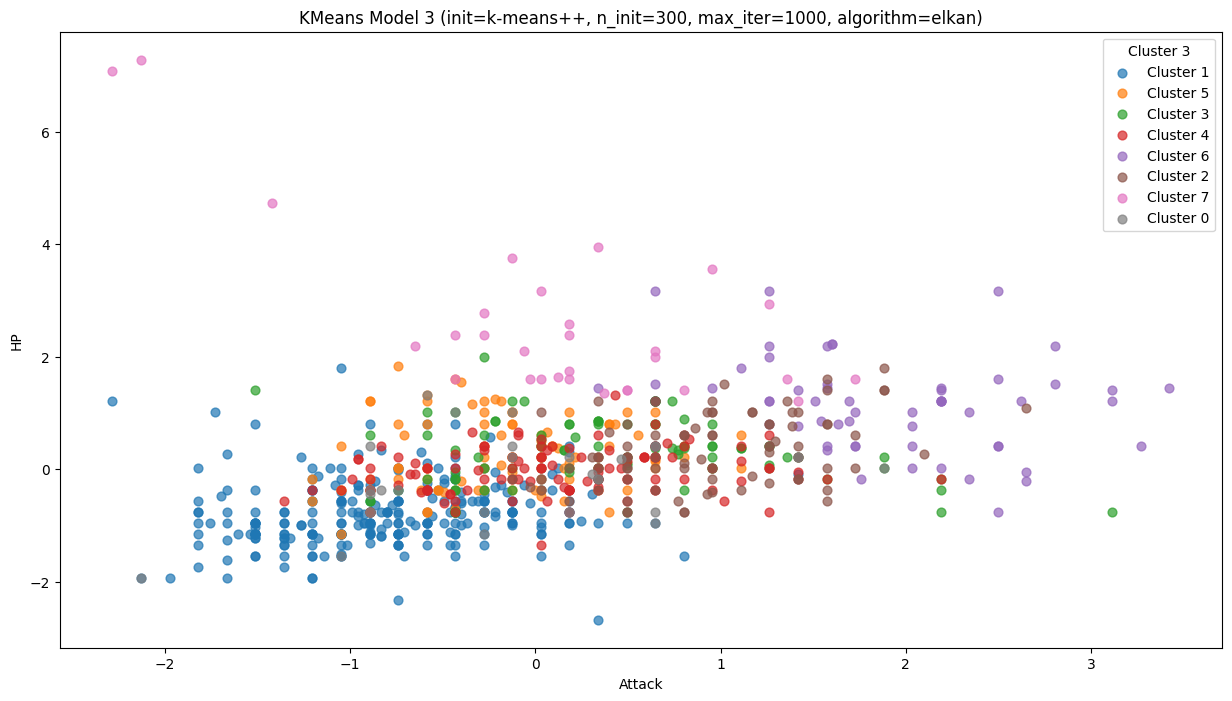

In [471]:

# Plot Model 1
plt.figure(figsize=(15,8))
for cluster in X['cluster1'].unique():
    subset = X[X['cluster1'] == cluster]
    plt.scatter(subset['Attack'], subset['HP'], label=f'Cluster {cluster}', s=40, alpha=0.7)
plt.title('KMeans Model 1 (init=k-means++, n_init=100, max_iter=300)')
plt.xlabel('Attack')
plt.ylabel('HP')
plt.legend(title="Cluster 1")
plt.show()

# Plot Model 2
plt.figure(figsize=(15,8))
for cluster in X['cluster2'].unique():
    subset = X[X['cluster2'] == cluster]
    plt.scatter(subset['Attack'], subset['HP'], label=f'Cluster {cluster}', s=40, alpha=0.7)
plt.title('KMeans Model 2 (init=random, n_init=200, max_iter=500)')
plt.xlabel('Attack')
plt.ylabel('HP')
plt.legend(title="Cluster 2")
plt.show()

# Plot Model 3
plt.figure(figsize=(15,8))
for cluster in X['cluster3'].unique():
    subset = X[X['cluster3'] == cluster]
    plt.scatter(subset['Attack'], subset['HP'], label=f'Cluster {cluster}', s=40, alpha=0.7)
plt.title('KMeans Model 3 (init=k-means++, n_init=300, max_iter=1000, algorithm=elkan)')
plt.xlabel('Attack')
plt.ylabel('HP')
plt.legend(title="Cluster 3")
plt.show()

## In a minimum of 5 sentences, reflect on your tuned models. Write what you judge the optimal amount of clusters to be and why. How do the plots of your clusters change with tuning specific parameters? Do your results make sense?

**I picked a k of 8 clusters because...** I thought the elbow appeared most distinct there, though 7 was a close second choice. I felt like it started to really even off at 8, though.

**Yes. My tuned models make sense because...**  they all produced very similar cluster groupings, even after changing the hyperparameters. Increasing n_init and max_iter did not seem to have a major visual impact on the separation of clusters — the overall structure and shape of the clusters stayed consistent across all three models. This suggests that my clustering is relatively stable and that the main groupings in the data are strong regardless of small changes in model settings. Given the diversity of Pokémon stats, it makes sense that some overlap would still occur, but the general separation across different stat ranges was still captured well. Overall, the models confirmed that my chosen number of clusters was reasonable, even though hyperparameter tuning didn’t dramatically alter the clustering.

## **Question 8 (10 points):**
## Now, examine the makeup of your clusters. Create plots and visualizations that may explain your initial groupings.

## You may do this by color coding your clusters by a given feature or by examining descriptive statistics of each cluster (ie: cluster 1 has an average temperature of 15 while cluster 2....)

## Write a **10 to 15 sentence** reflection on why you think your clusters have oriented the way they display. Are you clusters similar are very different in their feature makeup? Are you clusters similarly sized or are some much larger or smaller? Are there any aspects of the clusters that don't make sense when compared your original data or targets?




In [472]:
cluster_stats = X.groupby('cluster3').mean()
cluster_stats

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,cluster1,cluster2
cluster3,,,,,,,,,,
0,0.798224,-0.195102,-0.141852,2.560566,-0.184088,2.025690,-0.855218,0.36,6.0,3.0
1,-1.087875,-0.749557,-0.766616,-0.694028,-0.737679,-0.816794,-0.618417,2.00,1.0,6.0
2,0.401264,0.343910,0.945979,0.996806,-0.422251,-0.062135,-0.236970,0.00,0.0,2.0
3,1.085194,0.314311,0.387478,0.297644,1.447007,0.839007,1.018608,1.00,5.0,7.0
4,0.201995,-0.023641,0.114987,-0.322840,0.067691,-0.030940,1.026025,0.00,2.0,5.0
5,0.152824,0.240419,-0.172867,0.167116,0.377089,0.471664,-0.442918,0.00,7.0,1.0
6,1.858063,1.127633,1.872021,0.976555,1.294054,1.109473,1.021046,1.00,3.0,0.0
7,0.438722,2.568361,0.110946,-0.363962,-0.005708,0.206060,-0.369949,0.00,4.0,4.0


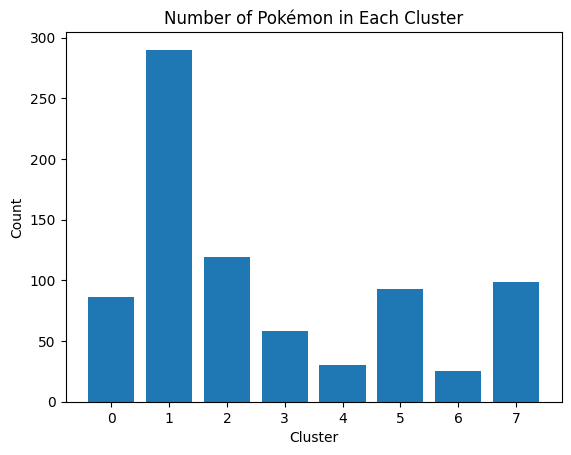

In [473]:
cluster_counts = X['cluster1'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.title('Number of Pokémon in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

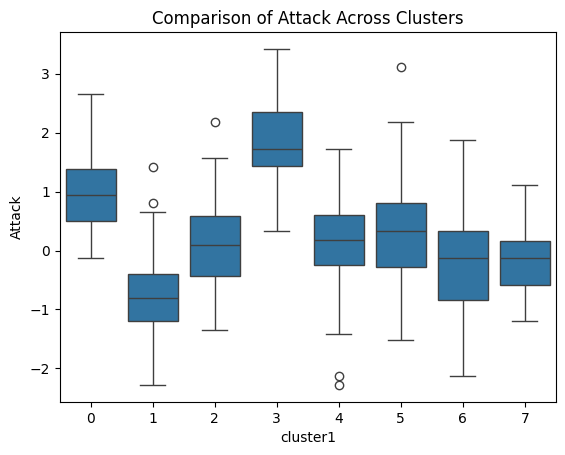

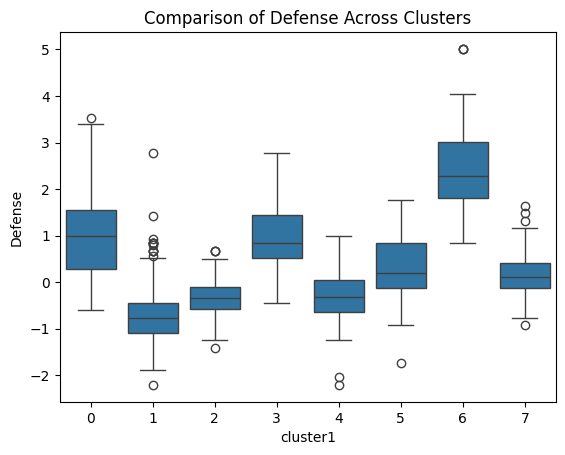

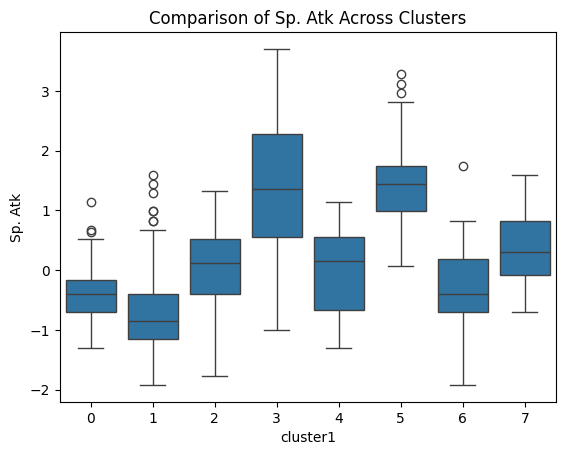

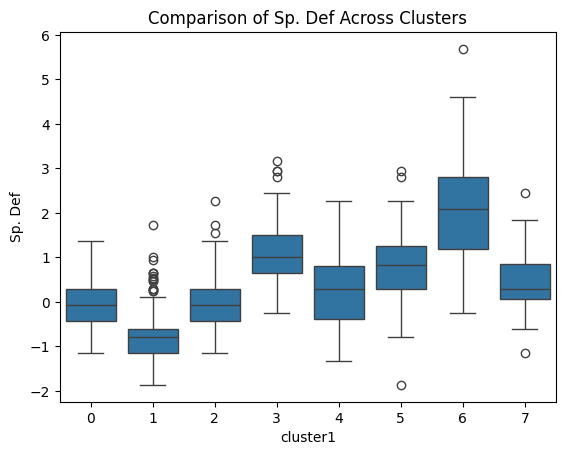

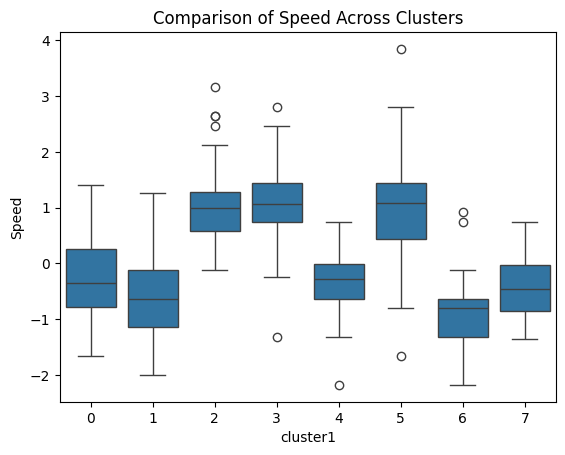

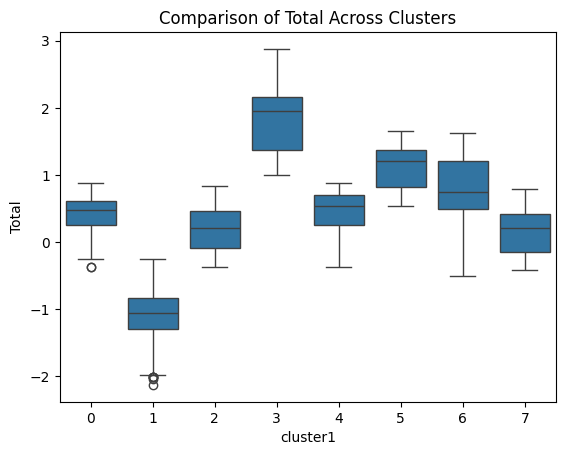

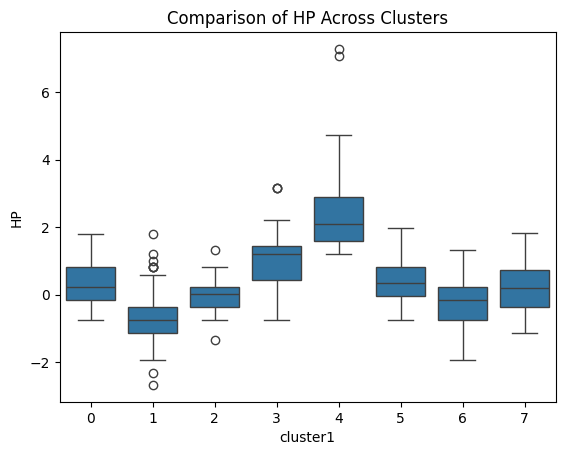

In [474]:
import seaborn as sns

for feature in ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total', 'HP']:
    sns.boxplot(x='cluster1', y=feature, data = X)
    plt.title(f'Comparison of {feature} Across Clusters')
    plt.show()

**After examining my clusters, I believe the groupings make sense because....** visually, I can see some general groupings on the plots, but they are not sharply separated. Looking at the descriptive statistics, there are still patterns — for example, certain clusters tend to have slightly higher averages in specific stats like Attack or HP, but the differences aren't extremely large. Cluster sizes also seem relatively even overall, with no cluster being dramatically larger or smaller than the others. There are some clusters, like clusters 5 and 6, that seem to perform well across most categories, suggesting a group of stronger Pokémon. Meanwhile, clusters like 1 and 7 appear a little weaker overall, having lower averages across multiple features. Cluster 3 is interesting because it doesn’t strongly excel or underperform in most stats except Speed, where it stands out more. However, the overlap between clusters in plots makes it hard to sharply categorize each group. When one cluster overlaps with another in one feature, it tends to vary slightly in another, which makes sense given the complex balance of Pokémon stats. Some groupings are reasonable, like identifying generally stronger Pokémon, but overall the clusters are not highly distinct. This isn't too surprising given how many Pokémon share similar stat spreads. Overall, I think the clustering did a decent job capturing general patterns, even if the groups are somewhat fuzzy around the edges.



# **Part 2: Principal Component Analysis (50 Points)**

## **Question 1 (15 points):**
## Fit a PCA model to a dataset if your choice. Write code to visualize the first 2 principal components and color code your groups to differentiate them.



In [475]:
standardized_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,cluster1,cluster2,cluster3
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,2,1,6,1
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,7,1,5
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,7,1,5
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,1,5,7,3
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,2,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...
795,1.375429,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341,1,6,3,0
796,2.209541,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611,1,3,0,6
797,1.375429,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310,1,5,7,3
798,2.042718,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635,1,3,0,6


In [476]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principal_components = pca.fit_transform(standardized_df.drop(['cluster', 'cluster1', 'cluster2', 'cluster3'], axis=1)) 

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

pca_df['Type 1'] = pokemon_df['Type 1']

pca_df

,PC1,PC2,PC3,PC4,PC5,Type 1
0,-1.840088,0.025494,-0.665107,0.169980,0.402885,9
1,-0.443543,0.050760,-0.668752,0.264308,0.225523,9
2,1.480309,0.058428,-0.627574,0.339387,0.002228,9
3,3.060557,-0.711939,-0.998631,-0.183487,0.311808,9
4,-2.045946,0.711499,-0.407573,-0.283886,0.167915,6
...,...,...,...,...,...,...
795,2.683327,-2.309632,-1.932665,-0.989354,0.248972,15
796,4.184047,0.802227,-0.652795,-1.793884,1.363686,15
797,2.806295,0.506877,-1.118799,0.838379,1.194418,14
798,4.074115,0.939550,-0.415932,0.214079,1.756301,14


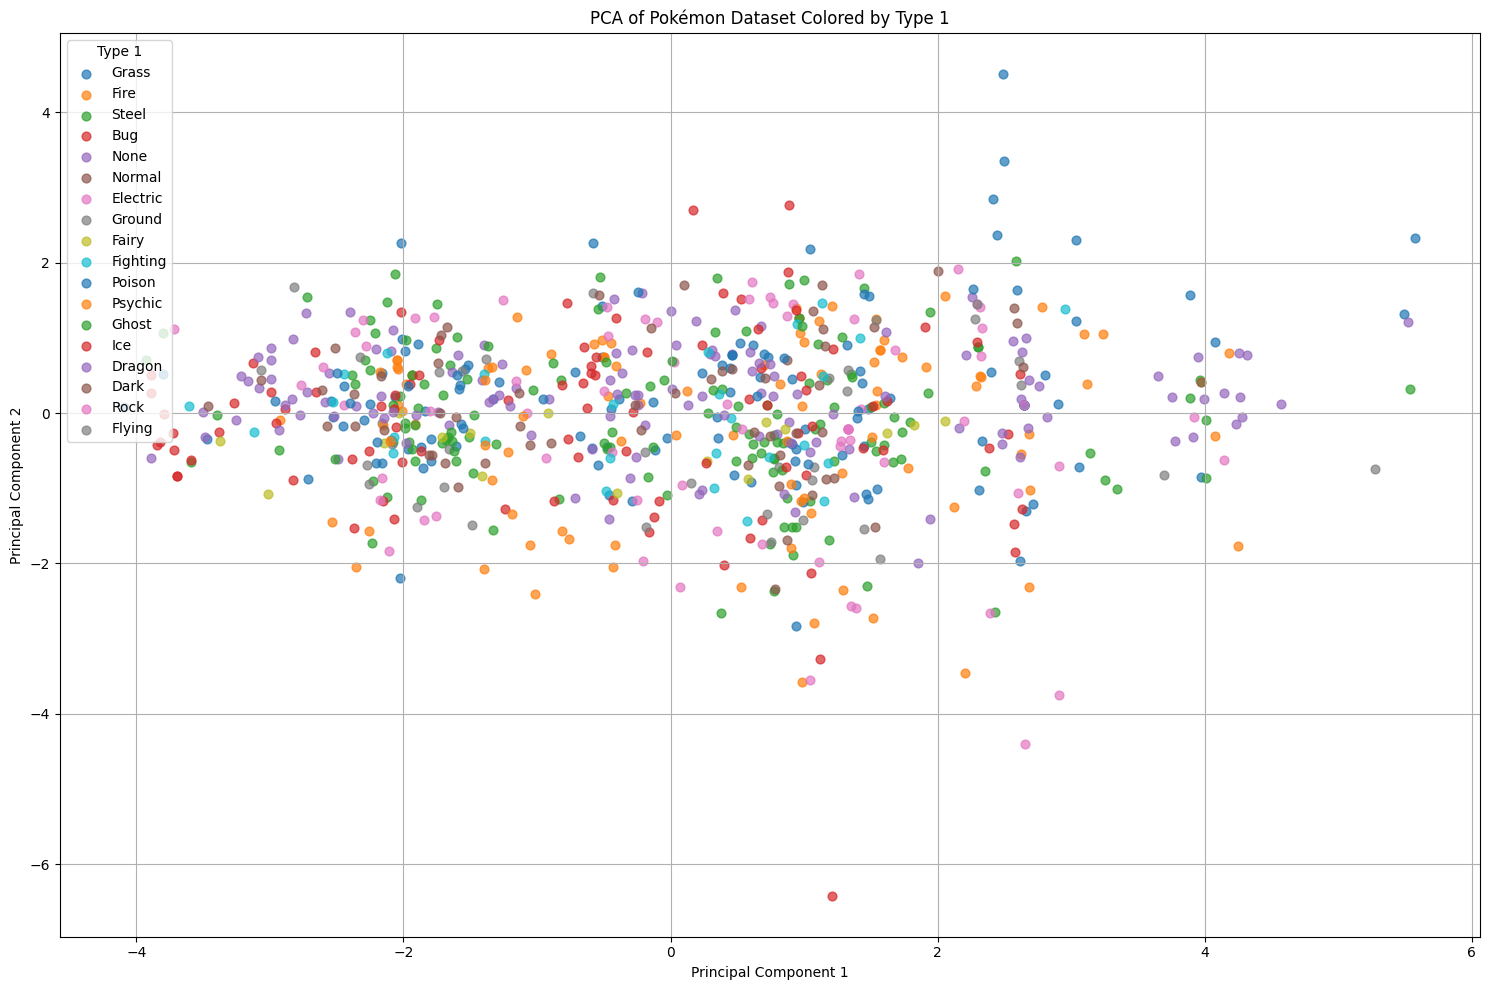

In [486]:
plt.figure(figsize=(15, 10))
for type in pca_df['Type 1'].unique():

    plotting = pca_df[pca_df['Type 1'] == type]

    plt.scatter(plotting['PC1'], plotting['PC2'], label=type_mapping[type], alpha=0.7, s=40)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Pokémon Dataset Colored by Type 1')
plt.legend(title='Type 1', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

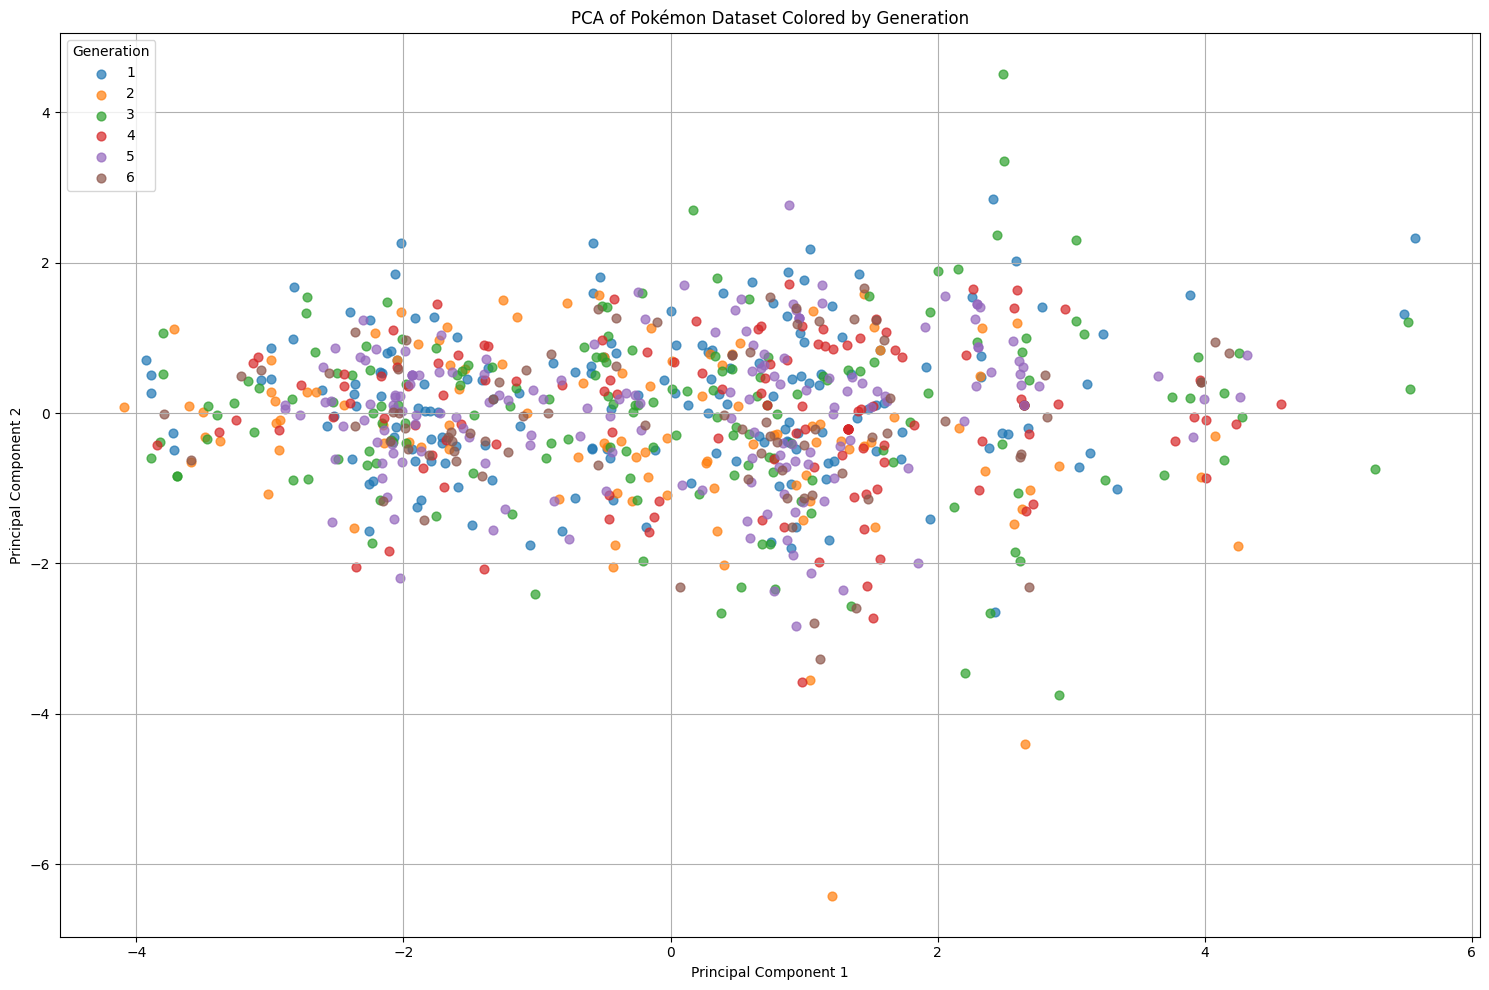

In [478]:
pca_df['Generation'] = pokemon_df['Generation']

plt.figure(figsize=(15, 10))
for type in pca_df['Generation'].unique():

    plotting = pca_df[pca_df['Generation'] == type]

    plt.scatter(plotting['PC1'], plotting['PC2'], label=type, alpha=0.7, s=40)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Pokémon Dataset Colored by Generation')
plt.legend(title='Generation', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

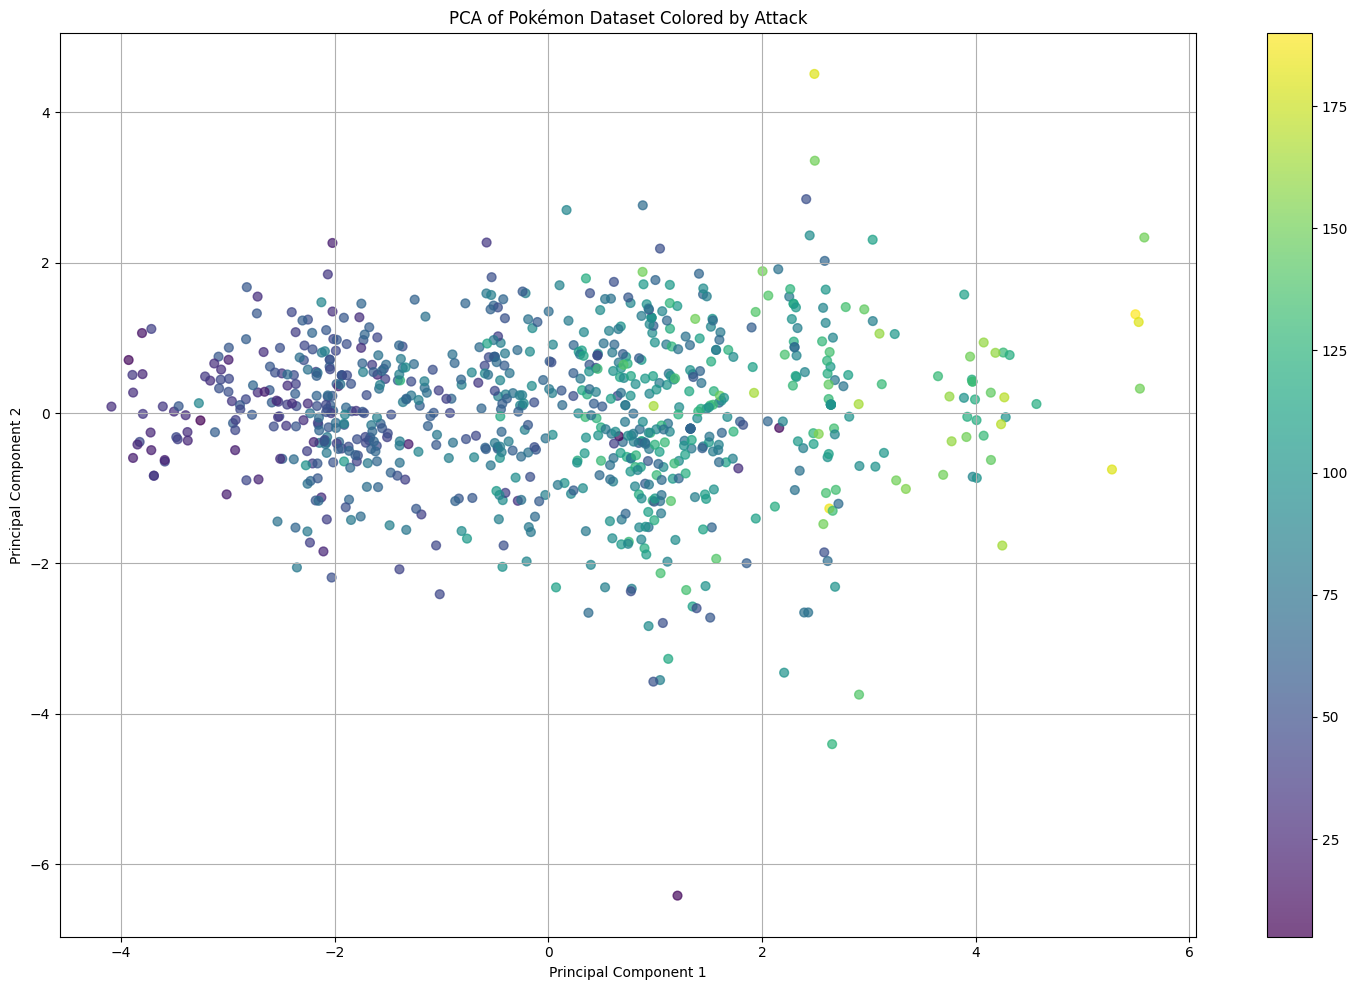

In [479]:
pca_df['Attack'] = pokemon_df['Attack']

plt.figure(figsize=(15, 10))

sc = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Attack'], alpha=0.7, s=40)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Pokémon Dataset Colored by Attack')
plt.colorbar()
plt.grid(True)
plt.tight_layout()
plt.show()

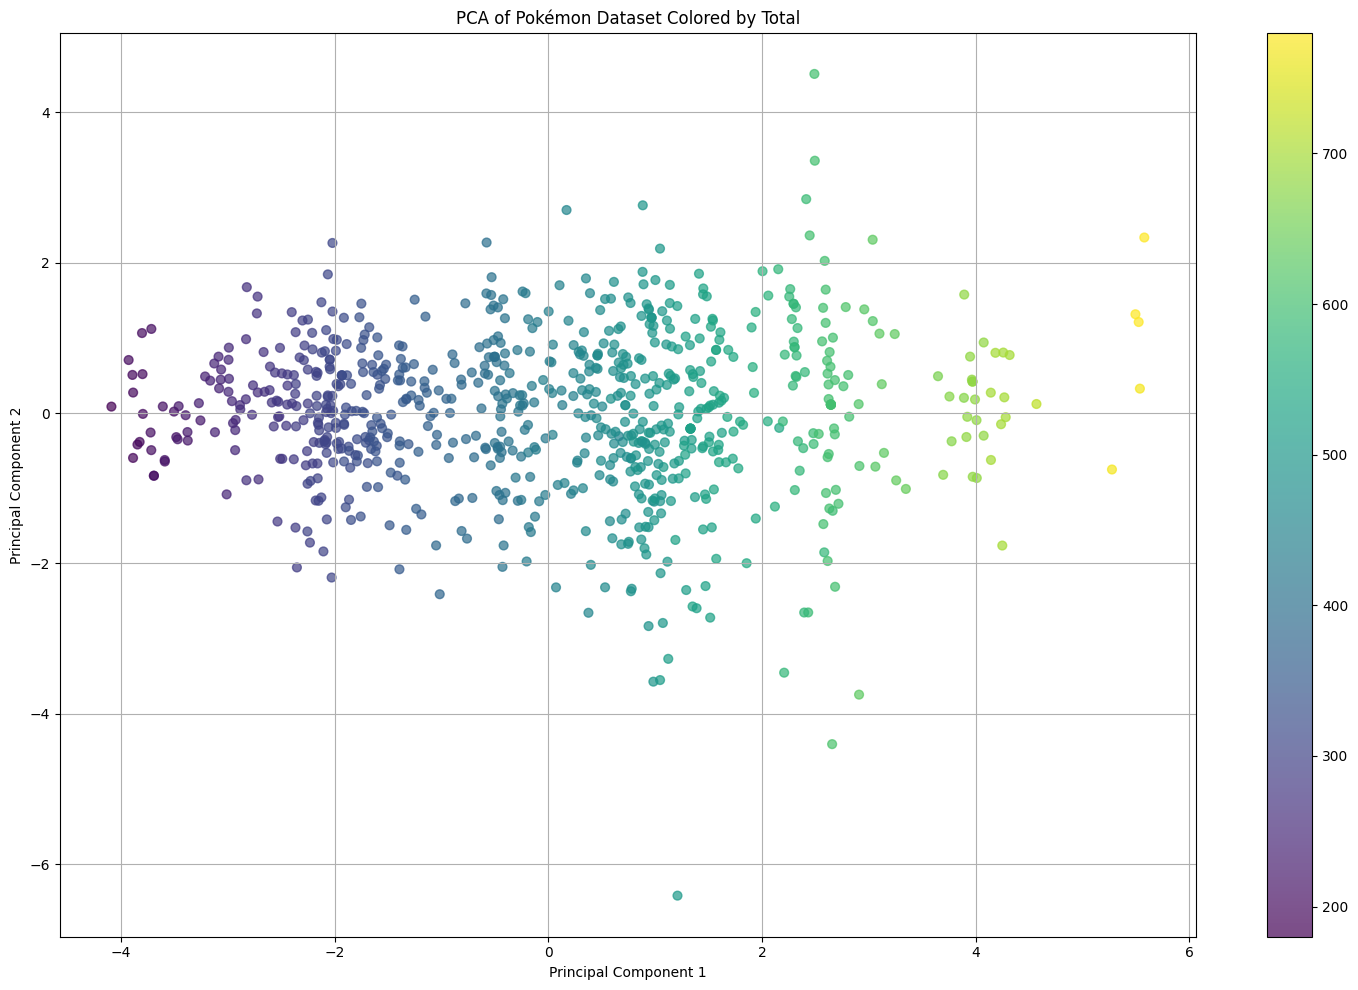

In [480]:
pca_df['Total'] = pokemon_df['Total']

plt.figure(figsize=(15, 10))

sc = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Total'], alpha=0.7, s=40)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Pokémon Dataset Colored by Total')
plt.colorbar()
plt.grid(True)
plt.tight_layout()
plt.show()

## **Question 2 (10 points):**
## Create 2 barplots:

*   The first barplot should show the percentage variance explained by each principal component

* The first barplot should show the **cumulative** percentage variance explained by each principal component. Add a horizontal red line on this graph depicting when the cumulative variance has hit 80%.


## Write 2 to 3 sentences on how many components explain 80% of the variability in your dataset. Are the results surprising given how much variance is in (or not in) your data? What features would you consider dropping based on your results and why?


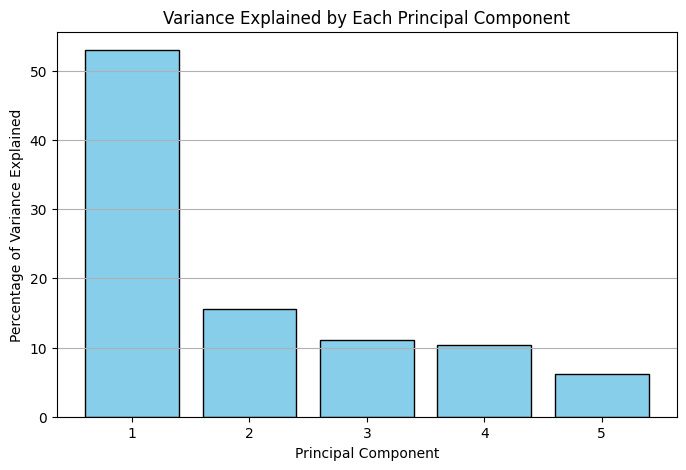

In [481]:
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var*100, color='skyblue', edgecolor='k')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.grid(axis='y')
plt.show()

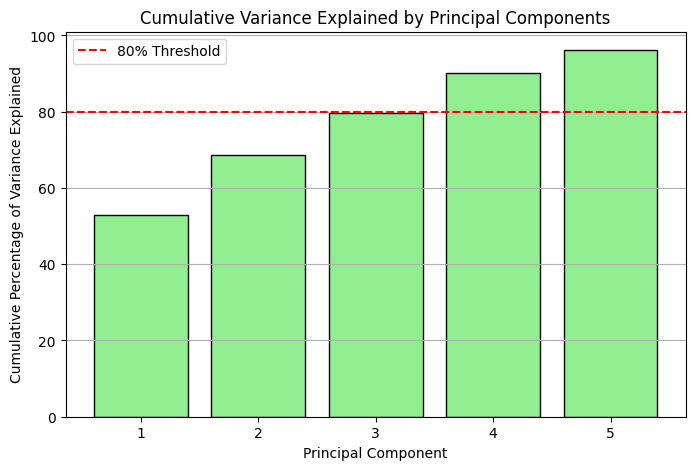

In [482]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(cumulative_var)+1), cumulative_var*100, color='lightgreen', edgecolor='k')
plt.axhline(y=80, color='red', linestyle='--', label='80% Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Percentage of Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.legend()
plt.grid(axis='y')
plt.show()

**It tales 4 components to explain...** about 80% of the variance in the dataset. This outcome isn't very surprising, given how many different factors contribute to a Pokémon’s overall performance — each stat captures a different aspect of their strengths or weaknesses, making it hard to compress all the variability into just a couple of components.

**I would consider dropping...** the Total column. Since it's just the sum of all the other stats (Attack, Defense, Speed, etc.), it seems to be overemphasizing information that's already captured elsewhere. The individual stat columns are more valuable for preserving the distinct traits that differentiate Pokémon from each other, so keeping them would be important for meaningful clustering and interpretation.

## **Question 3 (25 points):**
## Write **3 paragraphs**, supported by code and exploratory analysis, explaining and exploring the groupings you see in your data. Utilize data features to justify why the components that explain so much of the variance in your data are reasonable. Explain what kind of applications or decision making your analysis can help support.

## You may choose to explore beyond simply the first 2 principal components if you wish.



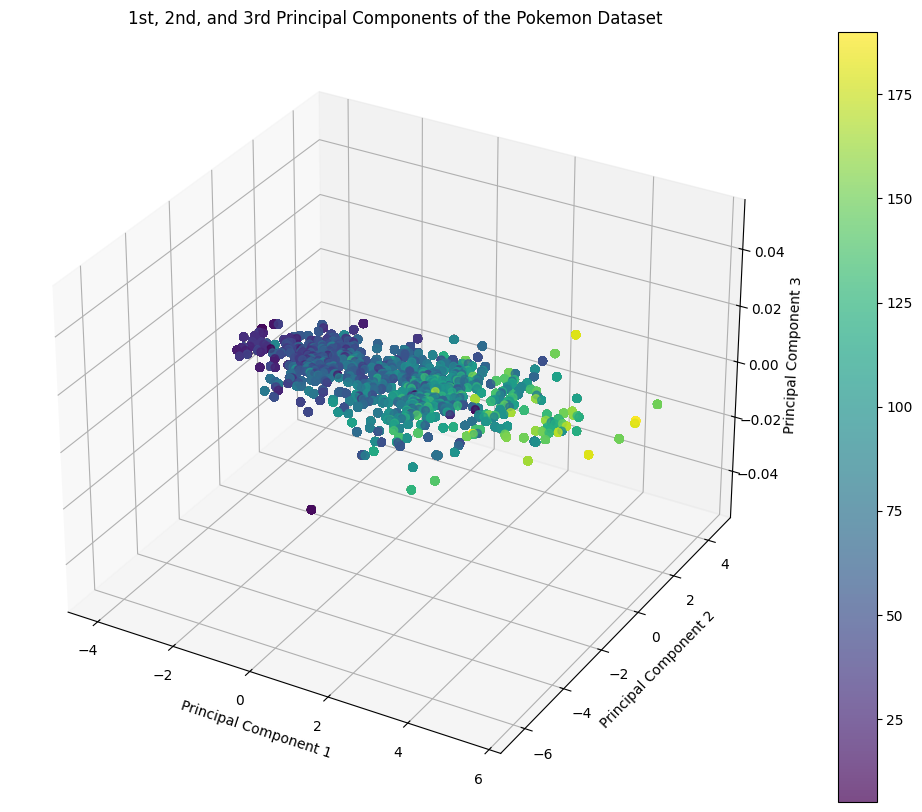

In [483]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

for poke_type in pca_df['Attack'].unique():

    plotting = pca_df[pca_df['Attack'] == poke_type]

    sc = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Attack'], alpha=0.7, s=30)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('1st, 2nd, and 3rd Principal Components of the Pokemon Dataset')
plt.colorbar()
plt.show()

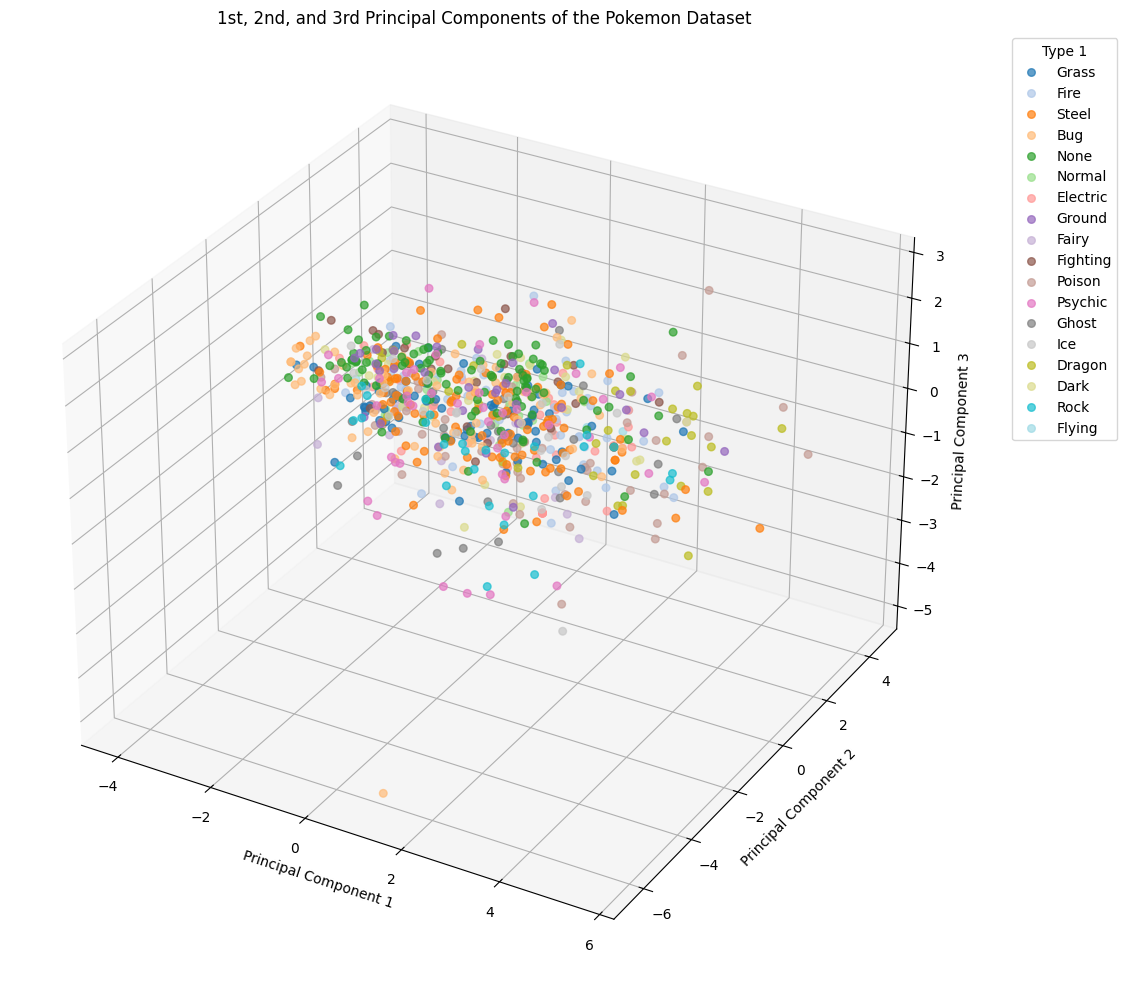

In [500]:
unique_types = pca_df['Type 1'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_types)))

type_color_map = dict(zip(unique_types, colors))

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

for poke_type in unique_types:
    subset = pca_df[pca_df['Type 1'] == poke_type]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=type_mapping[poke_type], color=type_color_map[poke_type], alpha=0.7, s=30)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('1st, 2nd, and 3rd Principal Components of the Pokemon Dataset')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Type 1')

plt.tight_layout()
plt.show()

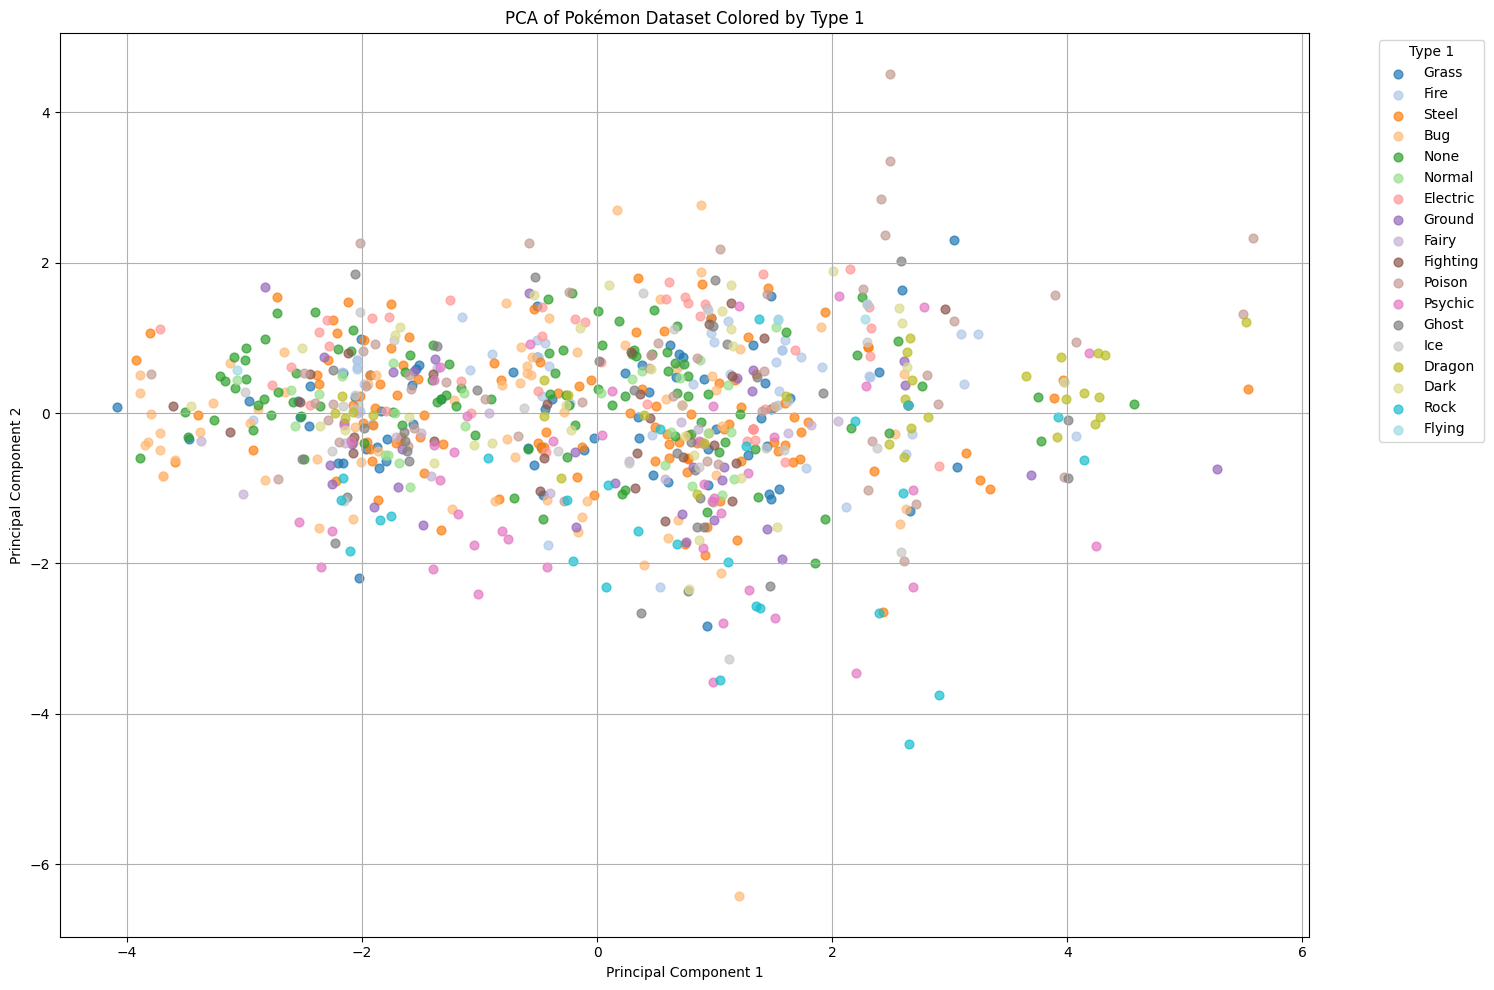

In [502]:
plt.figure(figsize=(15, 10))
for poke_type in pca_df['Type 1'].unique():

    plotting = pca_df[pca_df['Type 1'] == poke_type]

    plt.scatter(plotting['PC1'], plotting['PC2'], label=type_mapping[poke_type], color=type_color_map[poke_type], alpha=0.7, s=40)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Pokémon Dataset Colored by Type 1')
plt.legend(title='Type 1', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

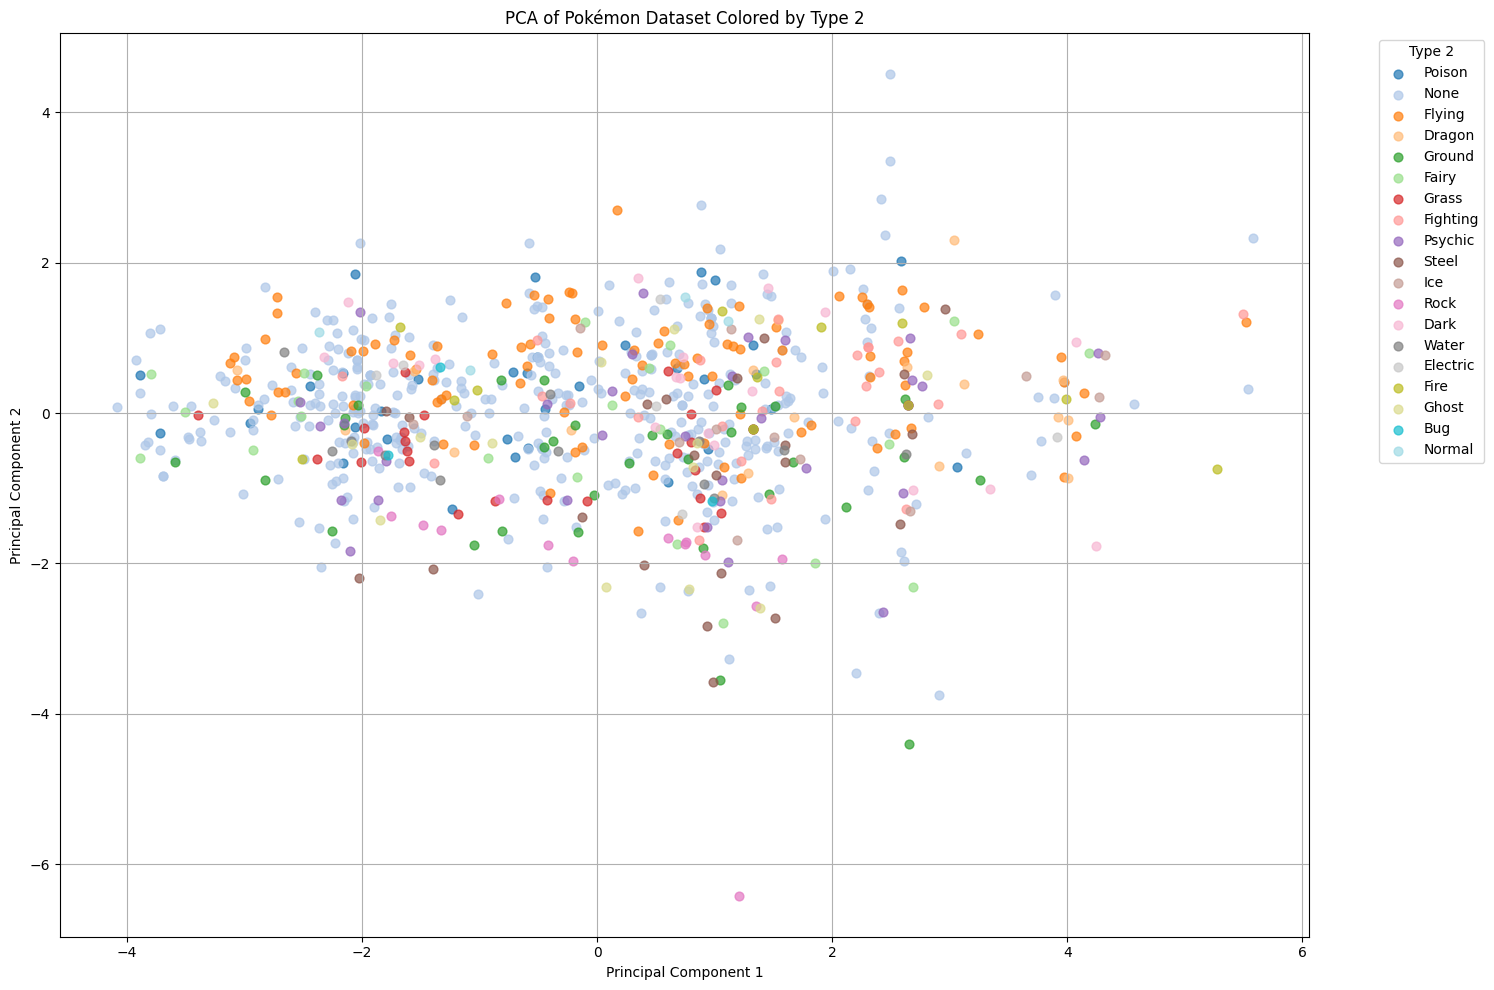

In [498]:
pca_df['Type 2'] = pokemon_df['Type 2']

unique_types2 = pca_df['Type 2'].unique()
colors2 = plt.cm.tab20(np.linspace(0, 1, len(unique_types2)))

type_color_map2 = dict(zip(unique_types2, colors2))

plt.figure(figsize=(15, 10))
for poke_type2 in pca_df['Type 2'].unique():

    plotting = pca_df[pca_df['Type 2'] == poke_type2]

    plt.scatter(plotting['PC1'], plotting['PC2'], label=type_mapping[poke_type2], color=type_color_map2[poke_type2], alpha=0.7, s=40)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Pokémon Dataset Colored by Type 2')
plt.legend(title='Type 2', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [485]:
# Let's group the data by Type 1 and get the mean of each feature
standard_scaled_poke_df = pokemon_df.copy()

for col in standard_scaled_poke_df.select_dtypes(include=['int64']).columns:
    standard_scaled_poke_df[col] = LabelEncoder().fit_transform(standard_scaled_poke_df[col])

standard_scaled_poke_df = standard_scaled_poke_df.drop(columns=['#', 'Name', 'Type 2', 'Legendary', 'Generation'])
standard_scaled_poke_df = standard_scaled_poke_df.groupby('Type 1').mean().reset_index()

standard_scaled_poke_df

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,85.884058,28.826087,44.434783,41.420290,30.202899,34.391304,39.811594
1,1,117.290323,36.967742,60.741935,42.612903,47.258065,39.290323,53.548387
2,2,150.812500,51.437500,77.281250,56.781250,62.687500,54.281250,60.250000
3,3,118.045455,31.295455,43.454545,39.250000,60.409091,43.454545,61.159091
4,4,100.823529,43.647059,36.235294,39.235294,51.470588,50.941176,28.176471
5,5,103.444444,39.259259,67.629630,39.407407,28.703704,35.296296,44.222222
6,6,123.230769,40.326923,57.230769,40.384615,59.634615,41.711538,52.250000
7,7,137.250000,42.000000,53.000000,40.250000,64.000000,43.000000,77.250000
8,8,114.062500,32.906250,47.343750,51.343750,50.937500,44.968750,42.656250
9,9,106.128571,37.728571,47.657143,43.114286,50.500000,40.457143,40.171429


**The principal components show...** that it becomes clear that clustering Pokémon based purely on their types is pretty difficult. While there are a few noticeable groupings — like Rock- and Bug-types clustering closer together — the separation isn’t perfect. In the PCA plot of the first two components, I noticed that Poison- and Electric-types tend to fall higher along the PC2 axis, while Grass- and Bug-types stay closer to each other lower on the plot. Although the clusters aren't distinct by just type alone, the patterns suggest that the principal components are capturing meaningful differences in stat profiles.

**The PCs responsible for explaining the majority (80%) of variance...** is the first four, which makes sense given how many different stats define a Pokémon's overall performance. It also shows why plotting everything in just two dimensions doesn’t perfectly capture all the groupings — we'd need a four-dimensional plot to fully represent the separation. Still, even in two dimensions, some patterns emerge based on playstyle and stat balance rather than just typing. From the spread of points, it's clear that some Pokémon cluster around common roles, like bulky tanks, fast attackers, or balanced all-rounders, instead of grouping strictly by element or type. If there were a specific target variable categorizing Pokémon by battle roles instead of types, the clusters would probably appear even more clearly.

**These results can be used for...** game design and competitive planning. Game developers could use these results to check whether there’s a good distribution of different stat archetypes or if certain kinds of Pokémon are overrepresented, which could affect game balance. They could also identify stat gaps that future Pokémon designs could fill, making gameplay more dynamic. On the player side, competitive players could use PCA groupings to find Pokémon that fit certain team roles, helping with strategies like team-building for tournaments. Ultimately, PCA doesn't just show us relationships between types — it highlights the underlying structure of the Pokémon stat landscape, which can support smarter game design and more strategic gameplay.



### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.